In [ ]:
# --- Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
from tqdm import tqdm

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

In [ ]:
# --- Load and Combine Data ---
# This cell loads all CSV files from the data directory and combines them into a single DataFrame.
# This might take a while and consume significant memory.
DATA_DIR = '../data/'
csv_files = glob(os.path.join(DATA_DIR, '*.csv'))

if not csv_files:
    print(f"Error: No CSV files found in {DATA_DIR}. Please download the CIC-DDoS2019 dataset.")
else:
    # For faster exploration, you might want to load only a subset of files
    # For a full analysis, load all of them.
    df_list = [pd.read_csv(f) for f in tqdm(csv_files, desc="Loading CSVs")]
    df = pd.concat(df_list, ignore_index=True)
    
    # Clean column names
    df.columns = df.columns.str.strip()
    
    print("Data loaded successfully.")
    print(f"Shape of the combined dataset: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())

Loading CSVs:   0%|          | 0/11 [00:00<?, ?it/s]/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/2103610514.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in tqdm(csv_files, desc="Loading CSVs")]
Loading CSVs:   9%|▉         | 1/11 [00:03<00:32,  3.23s/it]/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/2103610514.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in tqdm(csv_files, desc="Loading CSVs")]
Loading CSVs:  18%|█▊        | 2/11 [00:06<00:30,  3.44s/it]/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/2103610514.py:12: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f) for f in tqdm(csv_files, desc="Loading CSVs")]
Loading CSVs:  27%|██▋       | 3/11 [00:19<01:01,  

Data loaded successfully.
Shape of the combined dataset: (50063112, 88)

First 5 rows:
   Unnamed: 0                                Flow ID       Source IP  \
0           0     172.16.0.5-192.168.50.1-60675-80-6      172.16.0.5   
1           7     172.16.0.5-192.168.50.1-60676-80-6      172.16.0.5   
2       12858  192.168.50.7-65.55.163.78-50458-443-6    65.55.163.78   
3       10191  192.168.50.7-65.55.163.78-50465-443-6    65.55.163.78   
4         239         192.168.50.253-224.0.0.5-0-0-0  192.168.50.253   

   Source Port Destination IP  Destination Port  Protocol  \
0        60675   192.168.50.1                80         6   
1        60676   192.168.50.1                80         6   
2          443   192.168.50.7             50458         6   
3          443   192.168.50.7             50465         6   
4            0      224.0.0.5                 0         0   

                    Timestamp  Flow Duration  Total Fwd Packets  ...  \
0  2018-12-01 09:17:11.183810        5220

/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/634850877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Label'], order=df['Label'].value_counts().index, palette='viridis')


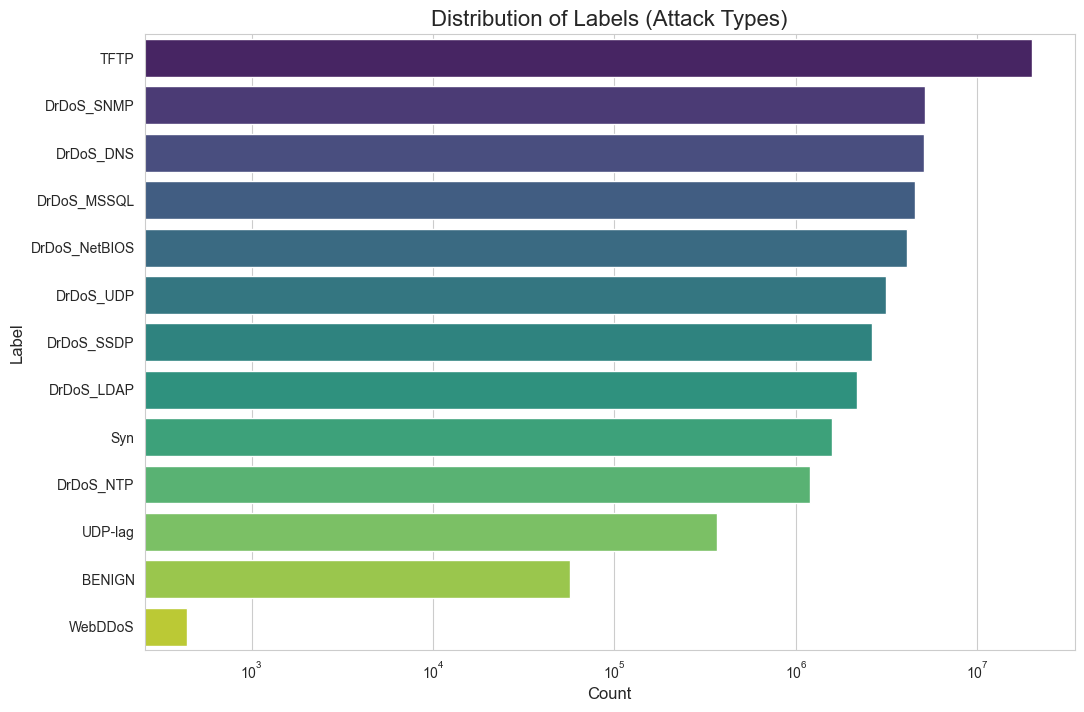

Label Counts:
Label
TFTP             20082580
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
Syn               1582289
DrDoS_NTP         1202642
UDP-lag            366461
BENIGN              56863
WebDDoS               439
Name: count, dtype: int64

Percentage of Benign Traffic: 0.1136%


In [ ]:
# --- Analyze Label Distribution (Class Imbalance) ---
# This cell reproduces the "Distribution of Labels (Attack Types)" chart from the report.
if 'df' in locals():
    plt.figure(figsize=(12, 8))
    sns.countplot(y=df['Label'], order=df['Label'].value_counts().index, palette='viridis')
    plt.title('Distribution of Labels (Attack Types)', fontsize=16)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Label', fontsize=12)
    plt.xscale('log') # Use a log scale due to severe imbalance
    plt.show()

    # Print exact counts
    label_counts = df['Label'].value_counts()
    print("Label Counts:")
    print(label_counts)
    print(f"\nPercentage of Benign Traffic: {label_counts['BENIGN'] / len(df) * 100:.4f}%")


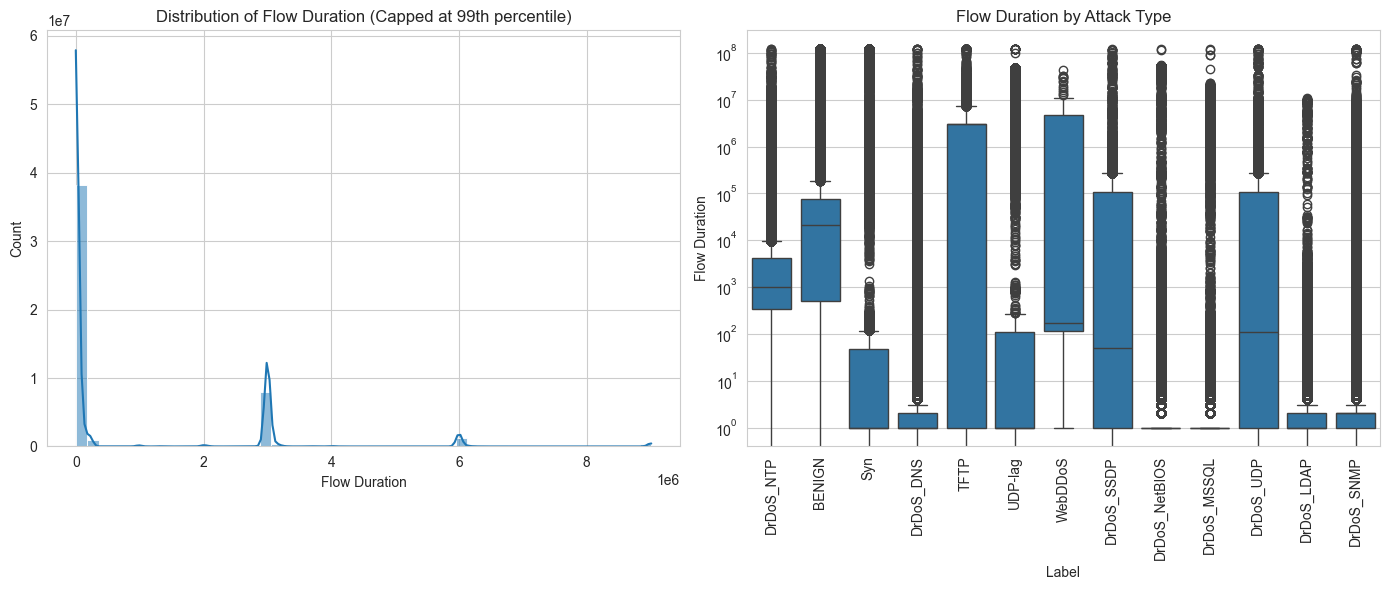

In [ ]:
# --- Analyze Flow Duration ---
# This cell reproduces the "Distribution of Flow Duration" plots.
if 'df' in locals():
    # Capping at the 99th percentile to handle extreme outliers for visualization
    cap_value = df['Flow Duration'].quantile(0.99)
    
    plt.figure(figsize=(14, 6))
    
    # Plot 1: Histogram of capped Flow Duration
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['Flow Duration'] < cap_value]['Flow Duration'], bins=50, kde=True)
    plt.title('Distribution of Flow Duration (Capped at 99th percentile)')
    plt.xlabel('Flow Duration')
    plt.ylabel('Count')

    # Plot 2: Boxplot by Attack Type
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Label', y='Flow Duration')
    plt.title('Flow Duration by Attack Type')
    plt.xlabel('Label')
    plt.ylabel('Flow Duration')
    plt.xticks(rotation=90)
    plt.yscale('log') # Log scale is necessary due to wide range of values
    
    plt.tight_layout()
    plt.show()

/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/4192158800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Protocol'], palette='Set2')


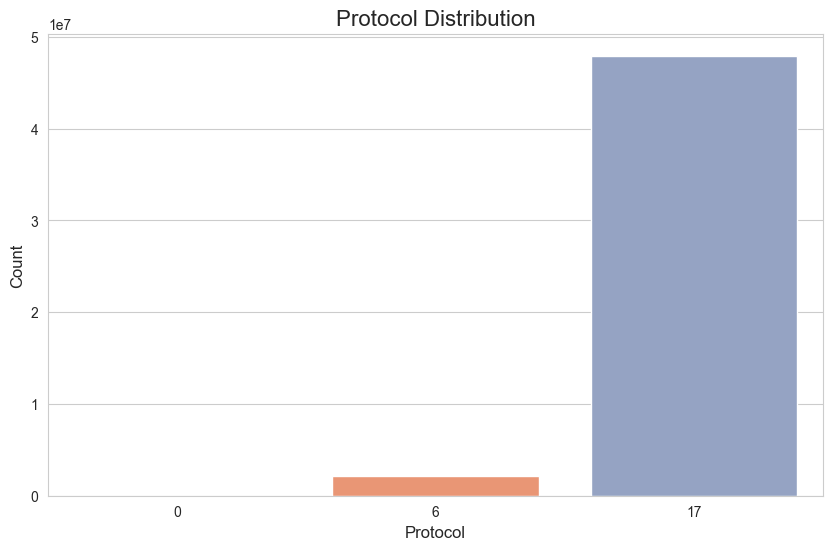

Protocol Counts:
Protocol
17    47960837
6      2099729
0         2546
Name: count, dtype: int64


In [ ]:
# --- Analyze Protocol Distribution ---
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df['Protocol'], palette='Set2')
    plt.title('Protocol Distribution', fontsize=16)
    plt.xlabel('Protocol', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()
    
    print("Protocol Counts:")
    print(df['Protocol'].value_counts())

/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/2039445869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_src_ports.index, y=top_10_src_ports.values, palette='viridis_r', order=top_10_src_ports.index)
/var/folders/h7/smj_n7z94wd30rq_4mjjr4_00000gn/T/ipykernel_33292/2039445869.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dst_ports.index, y=top_10_dst_ports.values, palette='viridis', order=top_10_dst_ports.index)


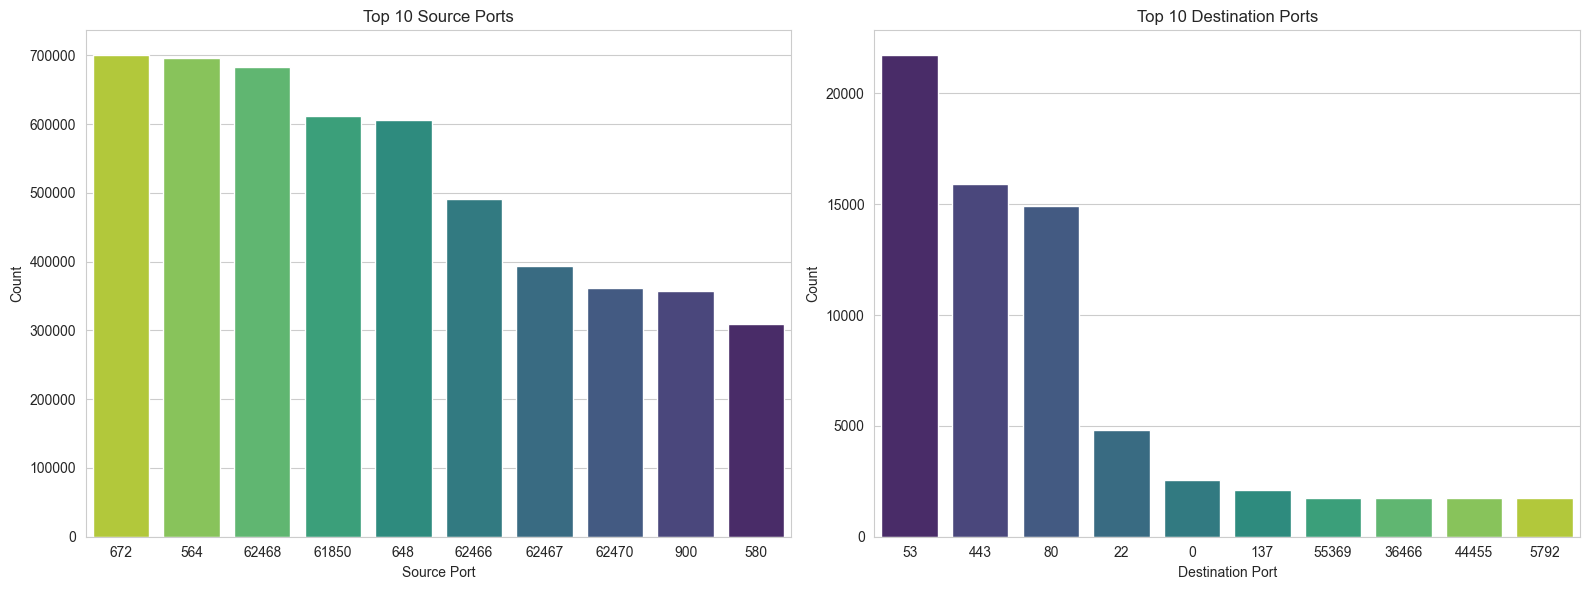

In [ ]:
# --- Analyze Top Source and Destination Ports ---
if 'df' in locals():
    plt.figure(figsize=(16, 6))

    # Top 10 Source Ports
    plt.subplot(1, 2, 1)
    top_10_src_ports = df['Source Port'].value_counts().nlargest(10)
    sns.barplot(x=top_10_src_ports.index, y=top_10_src_ports.values, palette='viridis_r', order=top_10_src_ports.index)
    plt.title('Top 10 Source Ports')
    plt.xlabel('Source Port')
    plt.ylabel('Count')

    # Top 10 Destination Ports
    plt.subplot(1, 2, 2)
    top_10_dst_ports = df['Destination Port'].value_counts().nlargest(10)
    sns.barplot(x=top_10_dst_ports.index, y=top_10_dst_ports.values, palette='viridis', order=top_10_dst_ports.index)
    plt.title('Top 10 Destination Ports')
    plt.xlabel('Destination Port')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

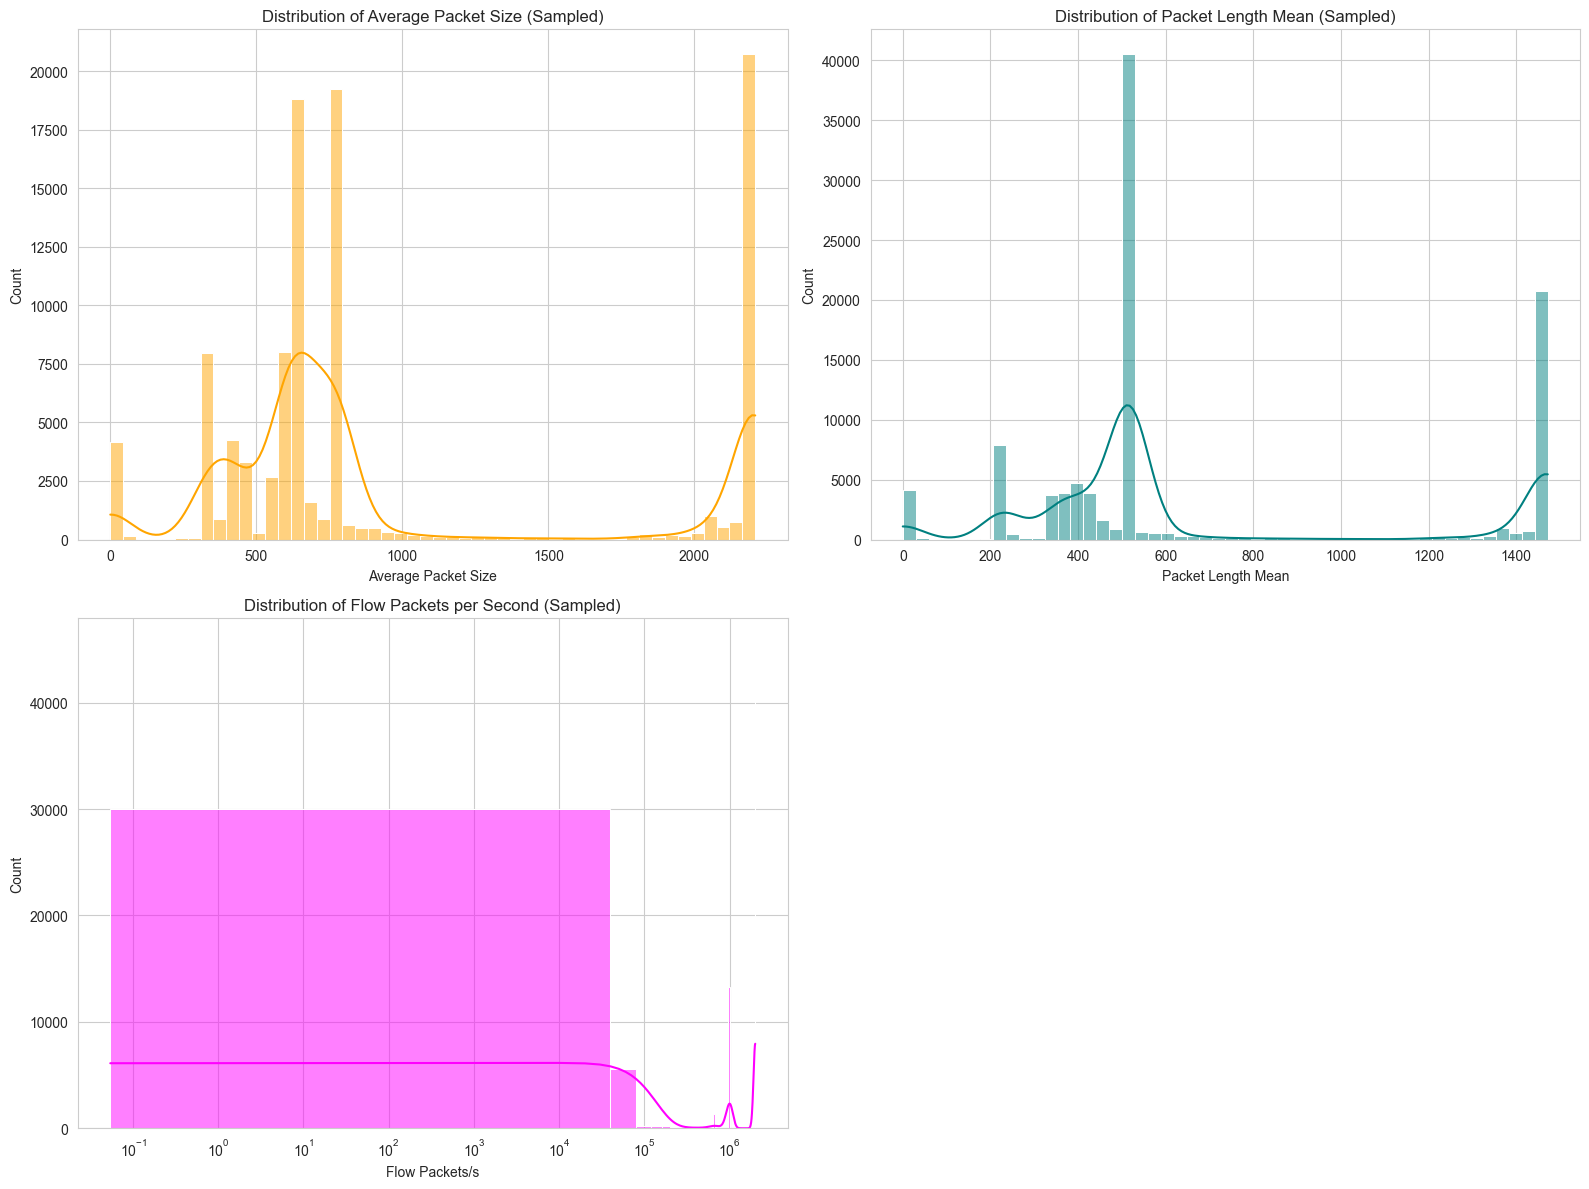

: 

In [ ]:
# --- Analyze Packet Size and Flow Rate ---
# Sample the data to make plotting faster for these dense distributions
if 'df' in locals():
    df_sample = df.sample(n=100000, random_state=42)
    
    plt.figure(figsize=(16, 12))

    # Average Packet Size
    plt.subplot(2, 2, 1)
    sns.histplot(df_sample['Average Packet Size'], bins=50, kde=True, color='orange')
    plt.title('Distribution of Average Packet Size (Sampled)')

    # Packet Length Mean
    plt.subplot(2, 2, 2)
    sns.histplot(df_sample['Packet Length Mean'], bins=50, kde=True, color='teal')
    plt.title('Distribution of Packet Length Mean (Sampled)')

    # Flow Packets per Second
    plt.subplot(2, 2, 3)
    # Handle infinite values that may arise from division by zero
    flow_packets_sec = df_sample['Flow Packets/s'].replace([np.inf, -np.inf], np.nan).dropna()
    sns.histplot(flow_packets_sec, bins=50, kde=True, color='magenta')
    plt.title('Distribution of Flow Packets per Second (Sampled)')
    plt.xscale('log') # Use log scale for better visualization

    plt.tight_layout()
    plt.show()